In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\alpes\OneDrive\Desktop\DataCentre\dataset.csv")



In [3]:
df.head()

,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.096799,1546300800
1,China,01/01/2019,Power,14.816100,1546300800
2,EU27 & UK,01/01/2019,Power,1.886490,1546300800
3,France,01/01/2019,Power,0.051217,1546300800
4,Germany,01/01/2019,Power,0.315002,1546300800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135408 entries, 0 to 135407
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   date       135408 non-null  object 
 2   sector     135408 non-null  object 
 3   value      135408 non-null  float64
 4   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [6]:
countries = ['Brazil', 'China', 'France', 'Germany', 'India', 'Italy', 
             'Japan', 'Russia', 'Spain', 'UK', 'US']
df_countries = df[df['country'].isin(countries)]

In [7]:
country_totals = df_countries.groupby('country')['value'].sum().sort_values(ascending=False)


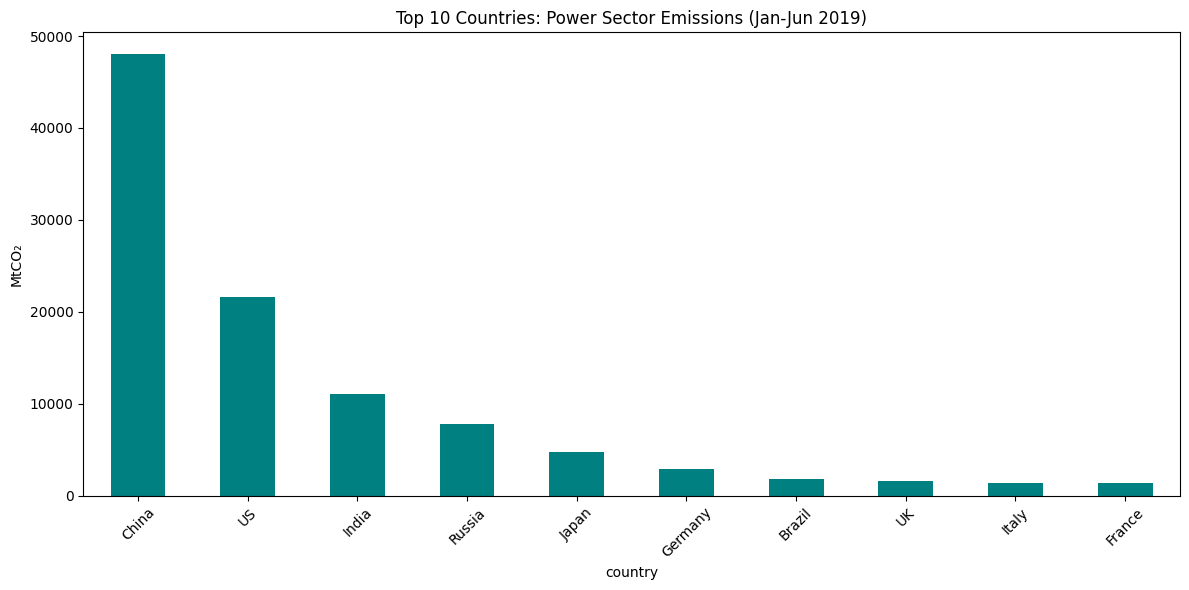

In [8]:
plt.figure(figsize=(12,6))
country_totals.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Countries: Power Sector Emissions (Jan-Jun 2019)')
plt.ylabel('MtCO₂')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

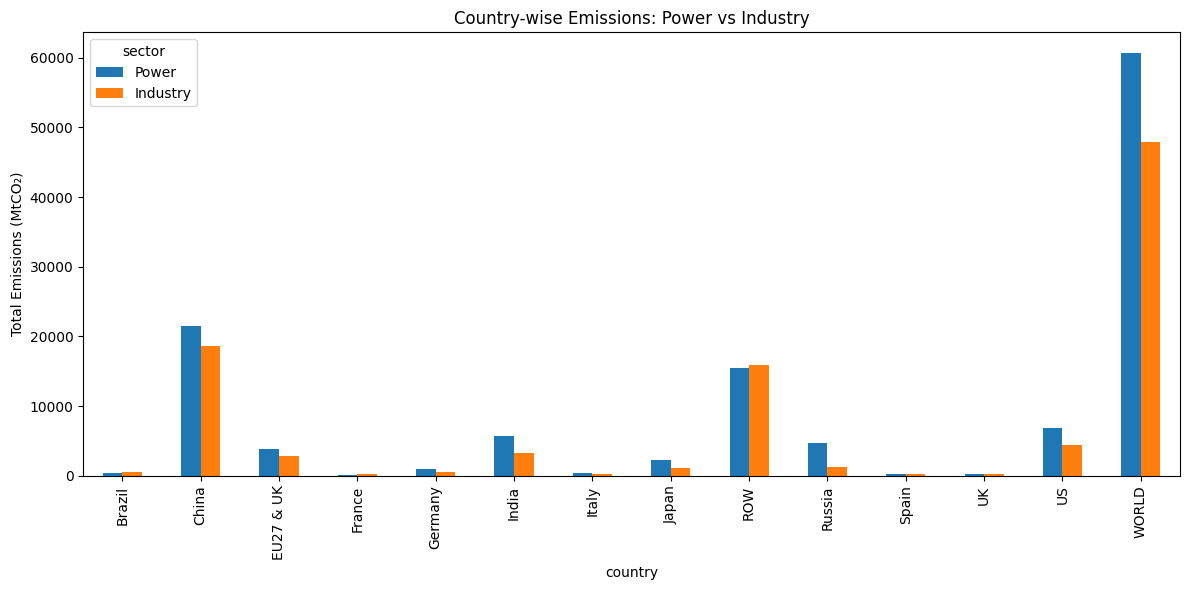

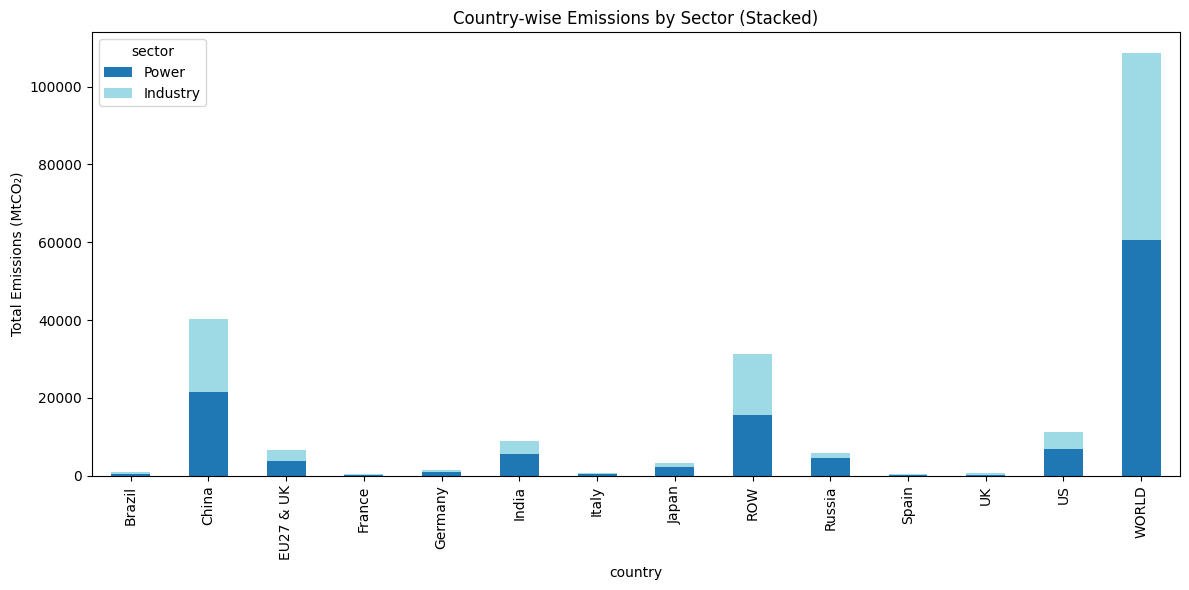

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\alpes\OneDrive\Desktop\DataCentre\dataset.csv")

# Filter for Power and Industry sectors only
df_filtered = df[df['sector'].isin(['Power', 'Industry'])]

# Aggregate: total emissions by country and sector
pivot = df_filtered.pivot_table(index='country', columns='sector', values='value', aggfunc='sum', fill_value=0)

# Plot: side-by-side bar chart for Power vs Industry emissions by country
pivot[['Power', 'Industry']].plot(kind='bar', figsize=(12,6))
plt.ylabel('Total Emissions (MtCO₂)')
plt.title('Country-wise Emissions: Power vs Industry')
plt.tight_layout()
plt.show()

# Optional: Stacked bar chart for share visualization
pivot[['Power', 'Industry']].plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel('Total Emissions (MtCO₂)')
plt.title('Country-wise Emissions by Sector (Stacked)')
plt.tight_layout()
plt.show()


sector     Domestic Aviation  Ground Transport      Industry  \
country                                                        
Brazil             40.452351        717.510008    562.345482   
China             232.331120       3897.655741  18642.332640   
EU27 & UK          56.844148       3855.057920   2799.221819   
France              8.005098        508.618472    258.345005   
Germany             5.711942        662.245309    523.157692   
India              25.673813       1238.634229   3260.301565   
Italy               7.053898        393.280876    234.670266   
Japan              35.120605        772.245182   1120.051613   
ROW               252.168208       9414.668960  15824.444360   
Russia             70.867859       1009.091917   1291.872144   
Spain              21.354595        369.456443    266.889250   
UK                  7.292504        502.041377    279.987894   
US                673.142040       6922.640040   4380.399670   
WORLD            1386.600166      27827.

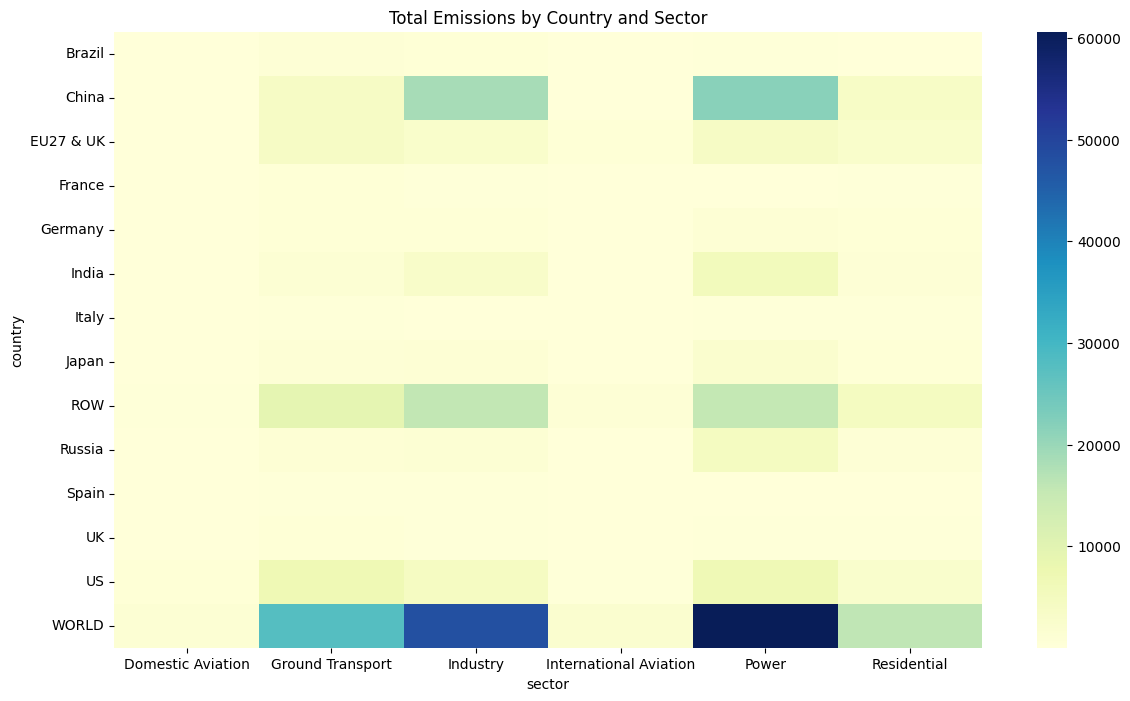

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\alpes\OneDrive\Desktop\DataCentre\dataset.csv")

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Group by country and sector, summing the emission values
grouped = df.groupby(['country', 'sector'])['value'].sum().reset_index()

# Pivot the table for better readability
pivot_table = grouped.pivot(index='country', columns='sector', values='value').fillna(0)

# Display the result
print(pivot_table)

# Optional: plot a heatmap
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.title('Total Emissions by Country and Sector')
plt.show()


<Figure size 1400x800 with 0 Axes>

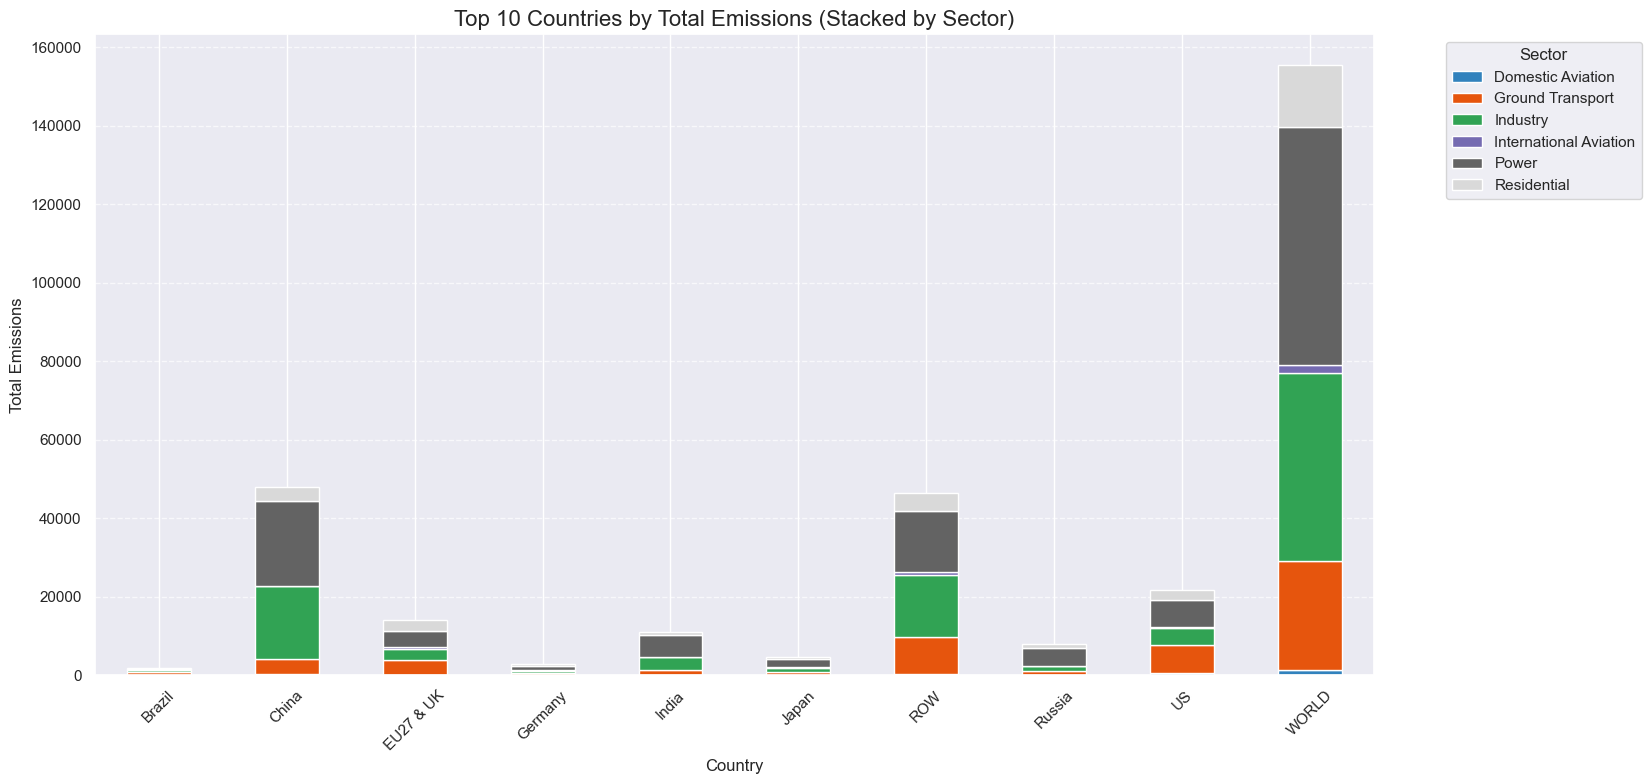

In [15]:
# Let's try a bar plot to represent total emissions by sector and country
# We'll visualize the top 10 countries with the highest total emissions

# Sum emissions per country
total_by_country = df.groupby('country')['value'].sum().sort_values(ascending=False).head(10)

# Get sector-wise emissions for top 10 countries
top_countries = total_by_country.index.tolist()
filtered_df = df[df['country'].isin(top_countries)]
sector_country_group = filtered_df.groupby(['country', 'sector'])['value'].sum().unstack().fillna(0)

# Plotting stacked bar chart
plt.figure(figsize=(14, 8))
sector_country_group.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(14, 8))

plt.title('Top 10 Countries by Total Emissions (Stacked by Sector)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
